In [1]:
!pip install category_encoders

import pandas as pd
import category_encoders as ce
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [6]:
import pandas as pd
import io

FILE_NAME = 'stores_sales_forecasting.csv' # This is the name of the file *within* the archive

# Access the uploaded file content directly
uploaded_file_content = uploaded['archive.zip']

try:
    # Use io.BytesIO to treat the uploaded content as a file
    # Then use pd.read_csv with compression='zip' to read the CSV from the archive
    df = pd.read_csv(
        io.BytesIO(uploaded_file_content),
        parse_dates=['Order Date', 'Ship Date'],
        encoding='latin1',
        compression='zip'
    )
    print("Data successfully loaded! ✅\n")

except Exception as e:
    print(f"❌ Error loading the data: {e}")

# If the data loaded successfully, proceed with inspection
if 'df' in locals() and not df.empty:
    print("--- First 5 Rows (df.head()) ---")
    print(df.head())
    print("\n" + "="*70 + "\n")

    print("--- Column Information and Data Types (df.info()) ---")
    df.info()
    print("\n" + "="*70 + "\n")

Data successfully loaded! ✅

--- First 5 Rows (df.head()) ---
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angel

Reduced dataset saved as IT24100693_VarianceThreshold_Sales_OHE.csv


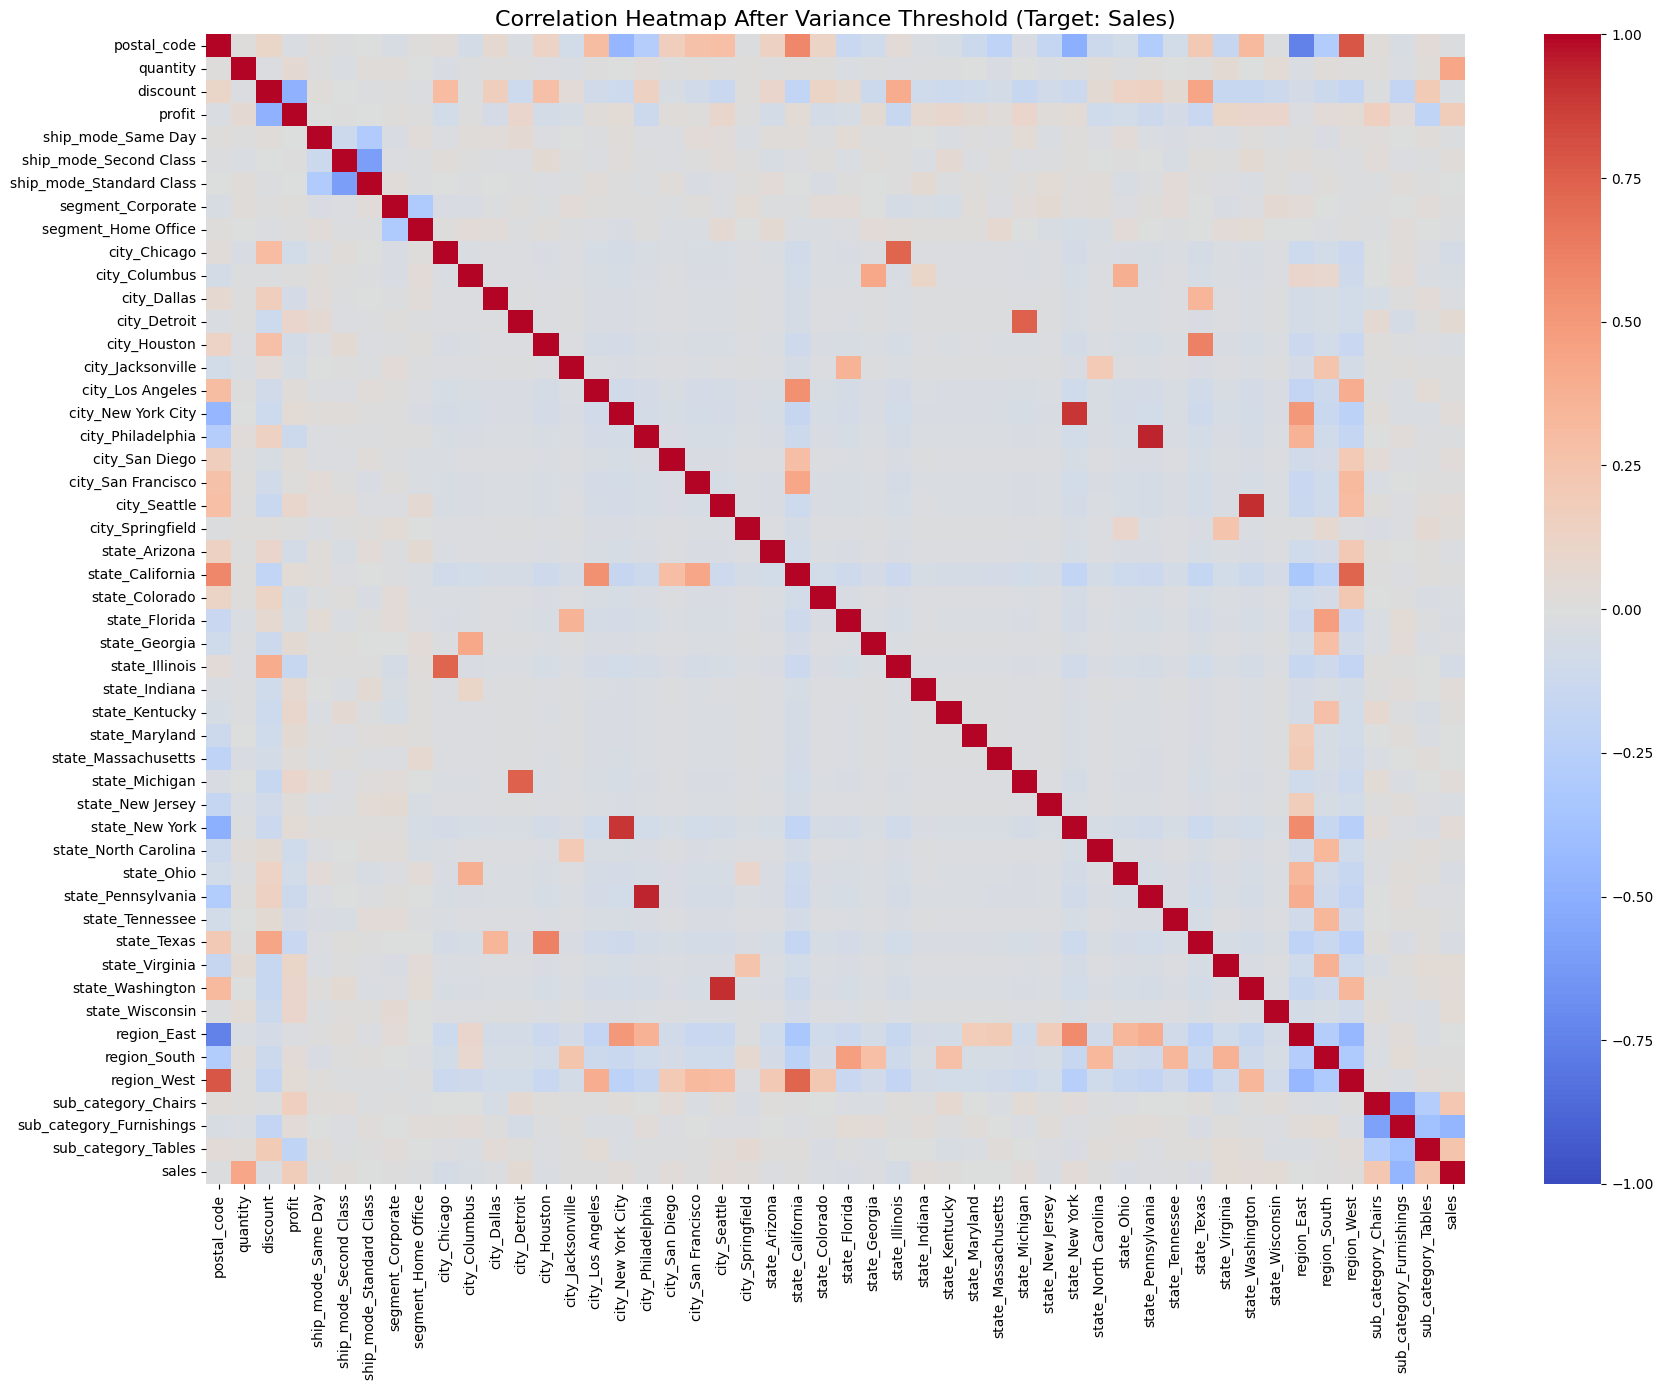

In [8]:
import pandas as pd
import io
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable is set to 'Sales' for this forecasting dataset
TARGET_COL = 'Sales'
FILE_NAME = 'stores_sales_forecasting.csv'

# --- 1. Data Loading and Preparation ---
# Use io.BytesIO to treat the uploaded content as a file
# Then use pd.read_csv with compression='zip' to read the CSV from the archive
uploaded_file_content = uploaded['archive.zip']
df = pd.read_csv(
    io.BytesIO(uploaded_file_content),
    parse_dates=['Order Date', 'Ship Date'],
    encoding='latin1',
    compression='zip'
)


# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
target = TARGET_COL.lower()

# Drop rows with missing values
df.dropna(inplace=True)

# --- 2. Feature/Target Split and Cleaning ---
cols_to_drop = [
    target, 'row_id', 'order_id', 'customer_id', 'customer_name',
    'product_id', 'product_name', 'order_date', 'ship_date'
]
X = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')
y = df[target]

# --- 3. Encoding Categorical Features (One-Hot Encoding) ---
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- 4. Variance Threshold for Feature Selection ---
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X_encoded)
selected_features = X_encoded.columns[selector.get_support()]

# Create the final reduced DataFrame
df_selected = pd.DataFrame(X_reduced_array, columns=selected_features)
df_selected[target] = y.values

# --- 5. Output and Visualization ---
df_selected.to_csv("IT24100693_VarianceThreshold_Sales_OHE.csv", index=False)
print("Reduced dataset saved as IT24100693_VarianceThreshold_Sales_OHE.csv")

corr = df_selected.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=False, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap After Variance Threshold (Target: Sales)", fontsize=16)
plt.tight_layout()
plt.savefig("correlation_heatmap_sales_variance.png")